In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,6.00,3


In [5]:
df2 = df1.copy(deep=True)
df2.loc[df2['WinMargin'] < 0, 'HTLoss'] = df2['HTLoss']-1
df2.loc[df2['WinMargin'] >= 0, 'HTWin'] = df2['HTWin']-1
df2.loc[df2['WinMargin'] < 0, 'ATWin'] = df2['ATWin']-1
df2.loc[df2['WinMargin'] >= 0, 'ATLoss'] = df2['ATLoss']-1
df2['HT%'] = df2['HTWin']/(df2['HTWin'] + df2['HTLoss'])
df2['AT%'] = df2['ATWin']/(df2['ATWin'] + df2['ATLoss'])
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,0.0,0.0,NaN,0.0,0.0,NaN,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,0.0,0.0,NaN,0.0,0.0,NaN,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,0.0,NaN,0.0,0.0,NaN,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,0.0,0.0,NaN,1.0,0.0,1.0,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,0.0,0.0,NaN,0.0,0.0,NaN,6,2,6,2,4,2006,11,44,2,6.00,3


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns.values
cols = np.delete(cols,np.where(cols=='average'))
cols

array(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin',
       'ATLoss', 'AT%', 'TopLine', 'TLCompany', 'BotLine', 'BLCompany',
       'NumComps', 'Year', 'Month', 'Week', 'Weekday', 'WinMargin'],
      dtype=object)

In [7]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
df2 = df2.fillna(0)
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
sc3 = StandardScaler()
df2[['average']] = sc3.fit_transform(df2[['average']])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,-1.699521,1.340681,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,0.449801
1,-1.586928,-0.120367,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308,0.524906
2,-1.474335,0.891128,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,-0.301253
3,-1.361743,0.216798,-1.370366,-1.365599,-2.46882,-1.309350,-1.360148,2.487914,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711,0.900433
4,-1.249150,0.666351,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609,-0.000832


In [8]:
df3 = df2.copy(deep=True)
#df3 = df3.drop(['TopLine','TLCompany','BotLine','BLCompany','NumComps'], axis=1)

In [9]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [18], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [18], axis=1)
test_x=tests[0]
test_y=tests[1]

In [10]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [11]:
train_y.head()

,WinMargin
0,0.449801
1,0.524906
2,-0.301253
3,0.900433
4,-0.000832


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


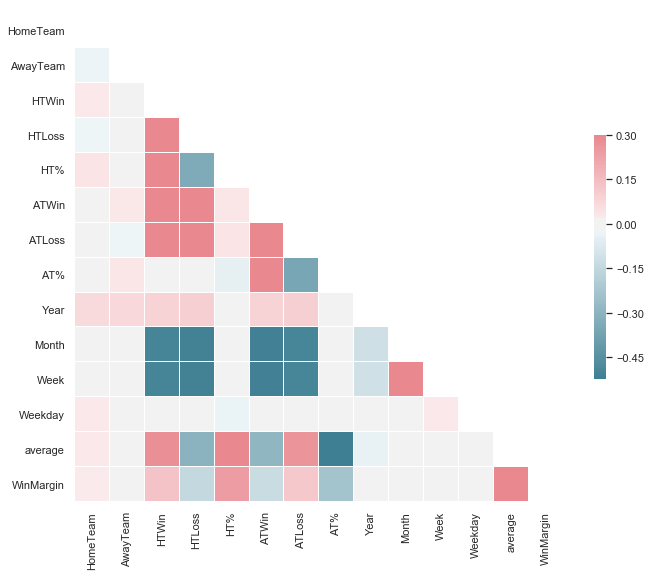

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[ 0.01217346,  0.0008878 ,  0.06125664,  0.03258843,  0.00182354,
        -0.05659793, -0.05524455,  0.00768765, -0.00801727, -0.06361117,
         0.03899131,  0.00947237,  0.45727191]])

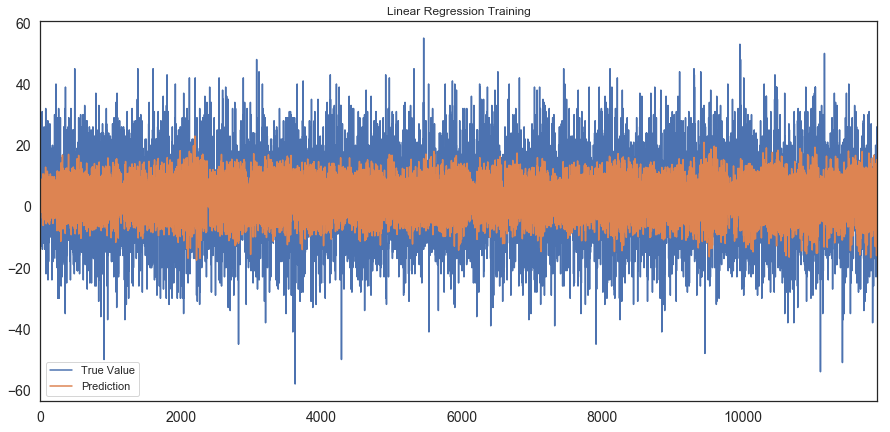

adj train r^2 = 0.21435395810689062
train mse = 136.47005915655825


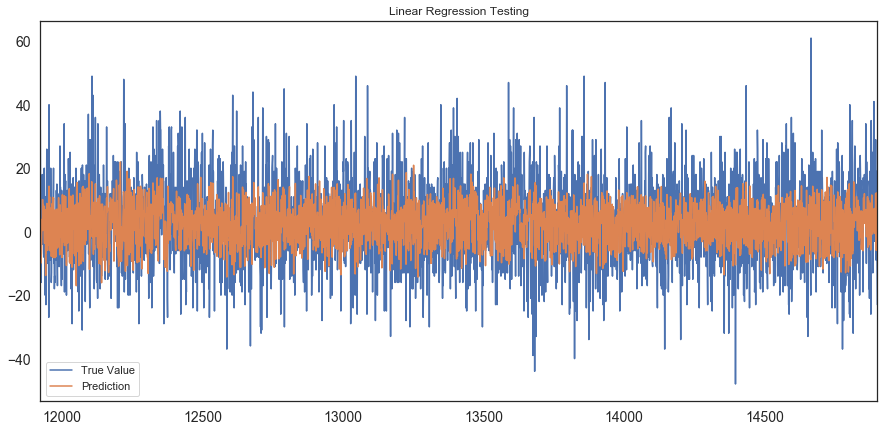

adj test r^2 = 0.20222474415132086
test mse = 152.06267215224335


In [26]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [27]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 51.15%
The testing accuracy is 49.95%


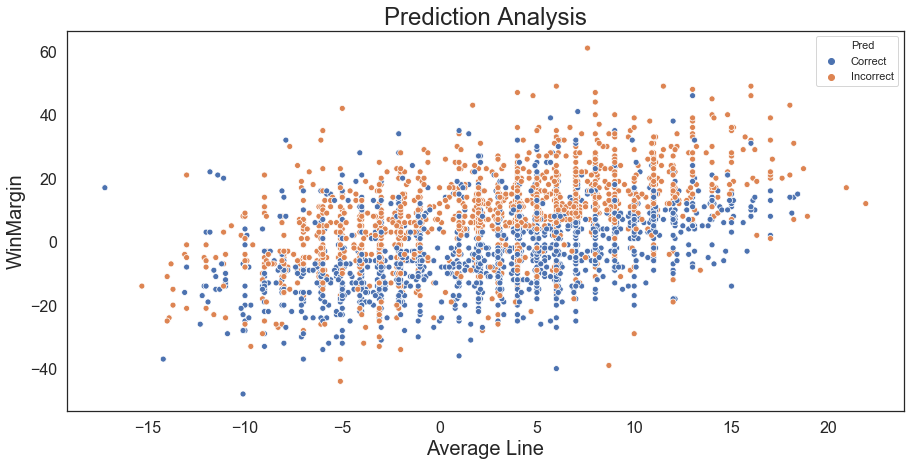

The testing accuracy is 49.95%


In [28]:
import seaborn as sns
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [20]:
test_y3.head()

,WinMargin,prediction,average,PredOver,Over,Pred
11922,32.0,-7.324850,-7.9,1.0,1.0,Correct
11923,6.0,3.834445,3.9,0.0,1.0,Incorrect
11924,-6.0,-9.916017,-10.0,1.0,1.0,Correct
11925,-16.0,-7.802427,-7.4,0.0,0.0,Correct
11926,10.0,-6.717189,-7.0,1.0,1.0,Correct


## Naive Model

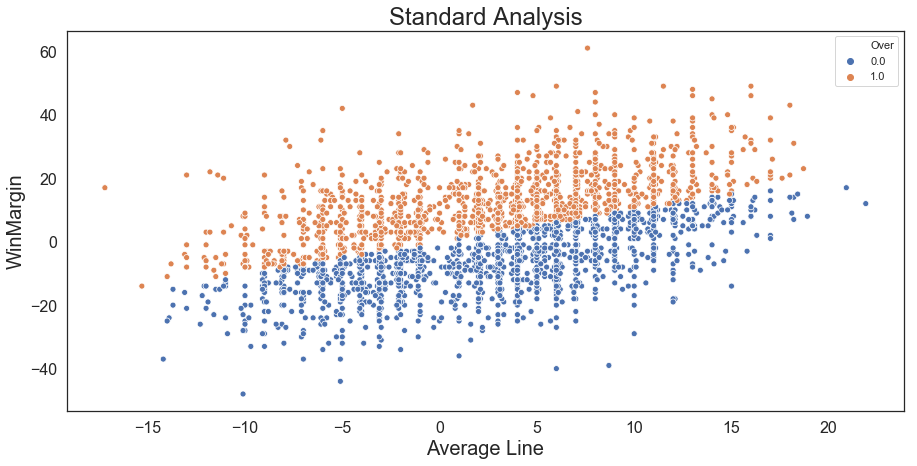

In [24]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Over", data=test_y3)
ax.set_title("Standard Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

In [29]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [30]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 48.98% of the time
Always picking under the line works 51.02% of the time


## Extra Trees

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

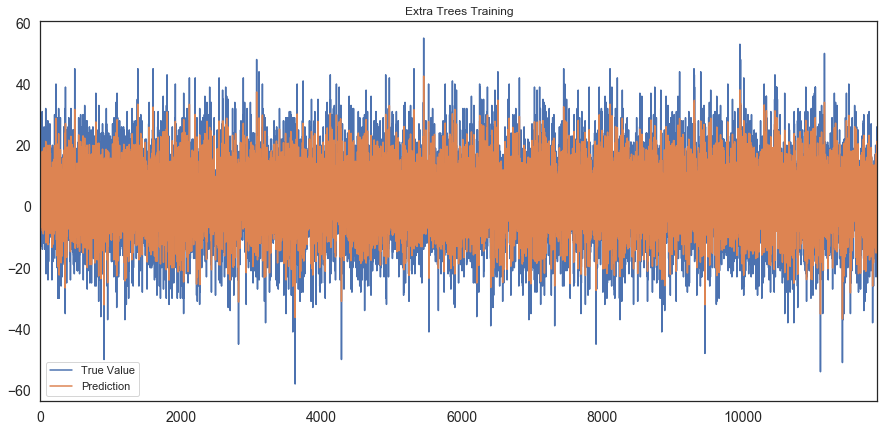

adj train r^2 = 0.8893602559977039
train mse = 19.218594130095685


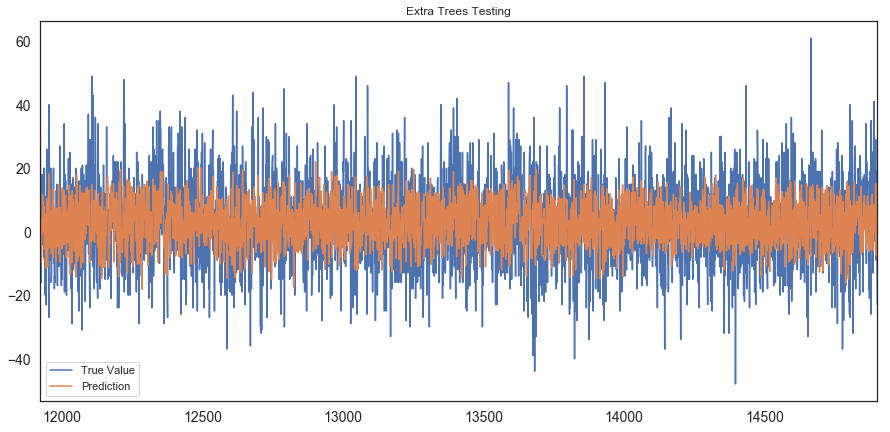

adj test r^2 = 0.18005162520037488
test mse = 156.28905507514253


In [32]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [33]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 96.23%
The testing accuracy is 49.21%


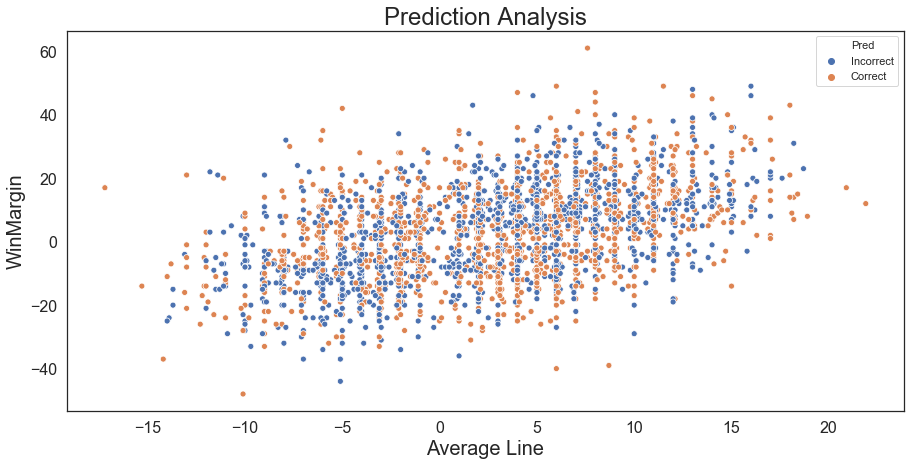

The testing accuracy is 49.21%


In [34]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Random Forrest

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

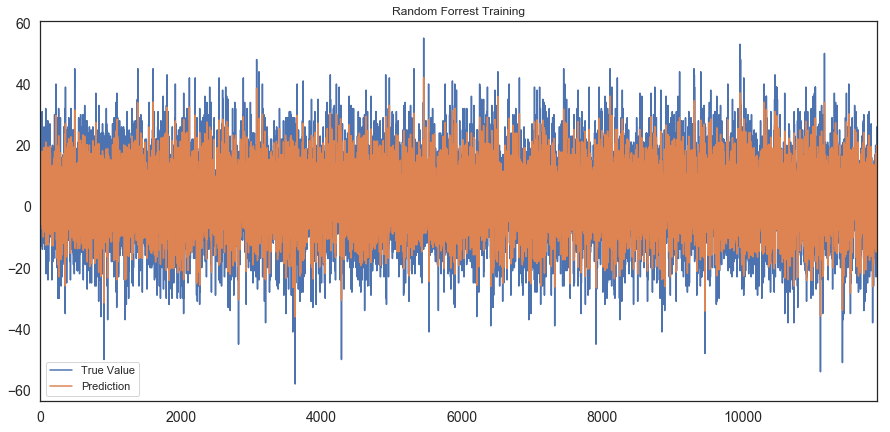

adj train r^2 = 0.8877945083684227
train mse = 19.490571153078406


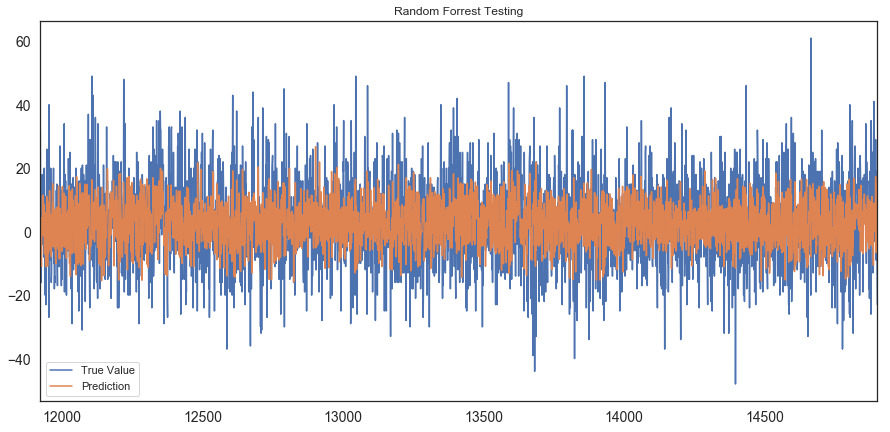

adj test r^2 = 0.1653820219938602
test mse = 159.08520480107344


In [36]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [37]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.48%
The testing accuracy is 48.14%


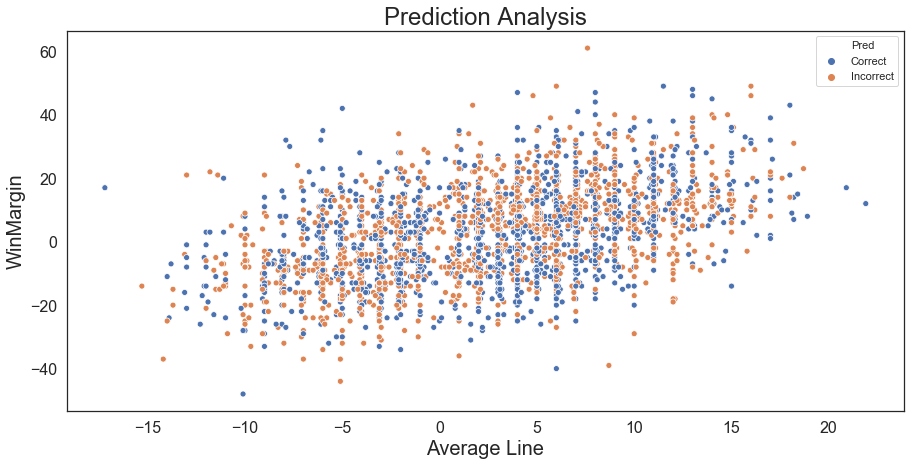

The testing accuracy is 48.14%


In [38]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## XGBoost

In [39]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [40]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.04)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

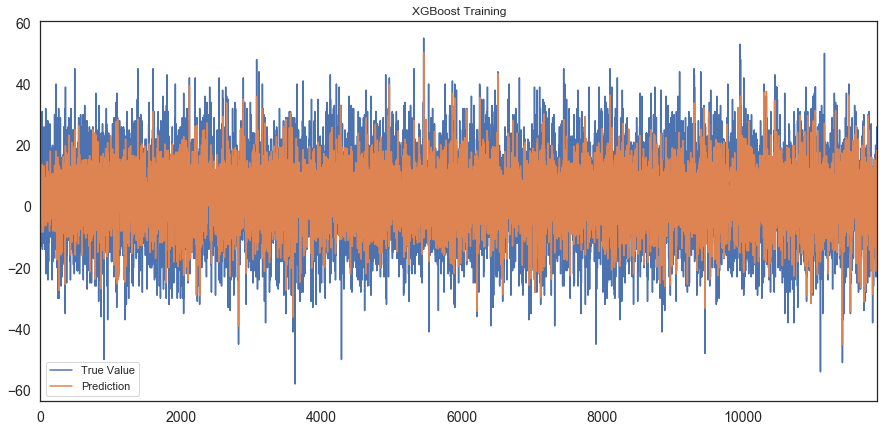

adj train r^2 = 0.6274154910273477
train mse = 64.7195139655944


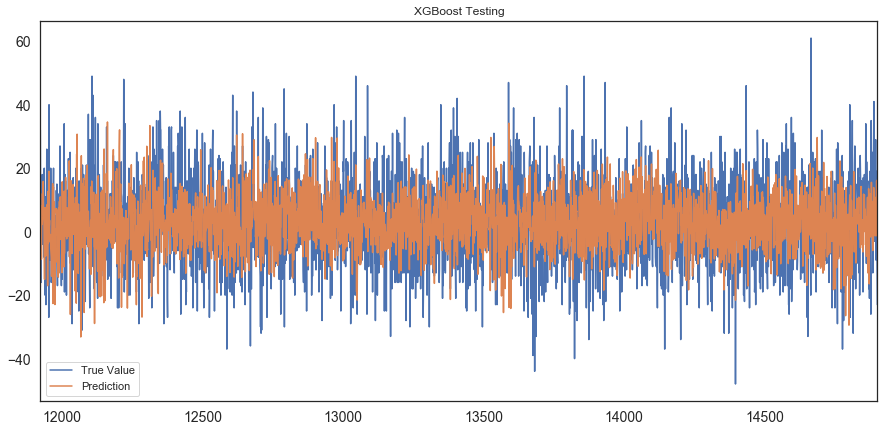

adj test r^2 = 0.006398016372711202
test mse = 189.38889314811436


In [41]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [42]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 78.78%
The testing accuracy is 51.33%


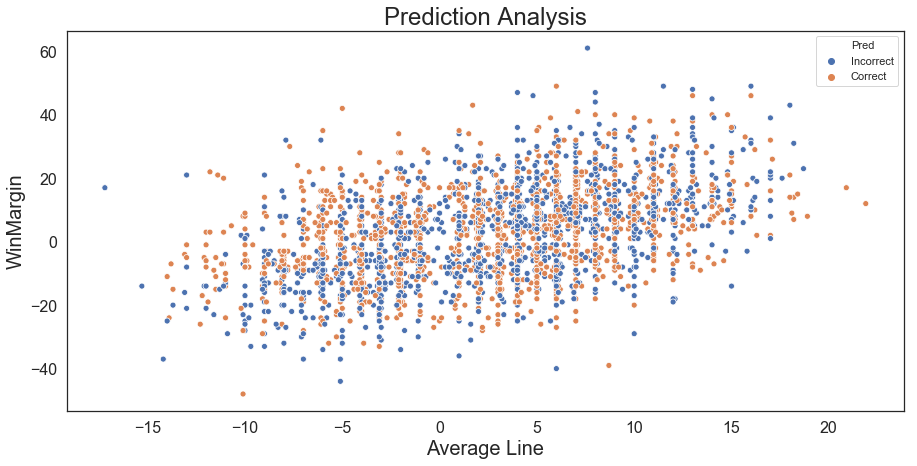

The testing accuracy is 51.33%


In [43]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Feed Forward Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [46]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=13, activation='tanh', kernel_regularizer=regularizers.l2(0.13)))
Dropout(.2)
model.add(Dense(34, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=500,verbose=0,shuffle=False)

Instructions for updating:
Use tf.cast instead.


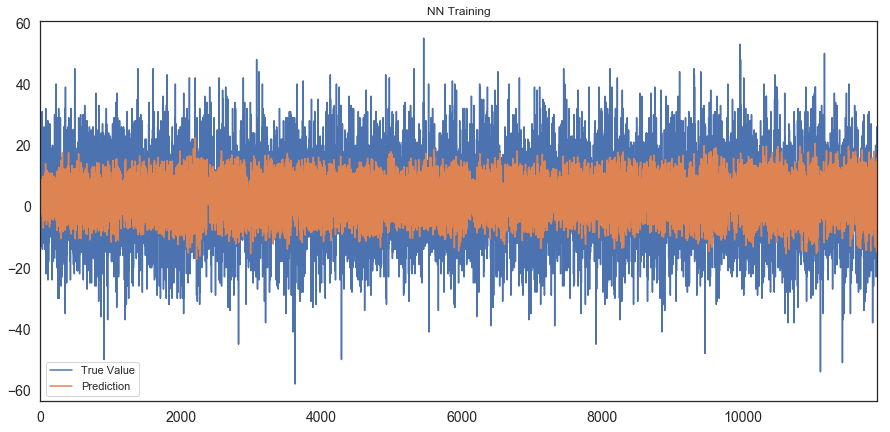

adj train r^2 = 0.20860929301583853
train mse = 137.46793191732647


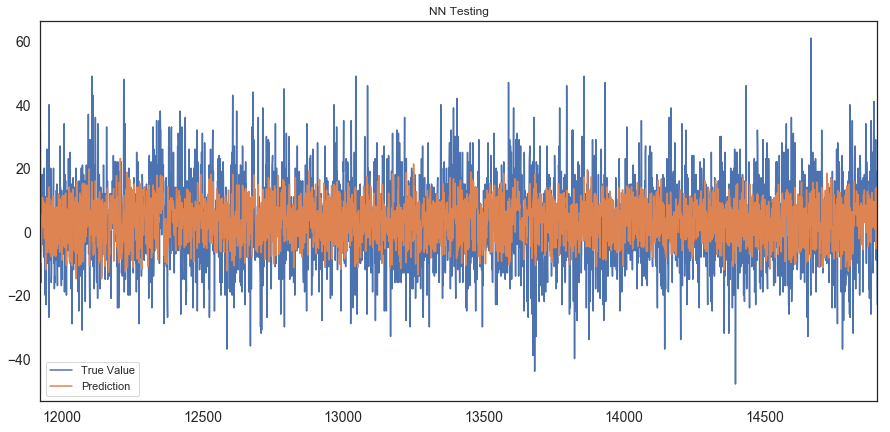

adj test r^2 = 0.19622787150288257
test mse = 153.20572650595122


In [47]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [48]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 50.42%
The testing accuracy is 49.35%


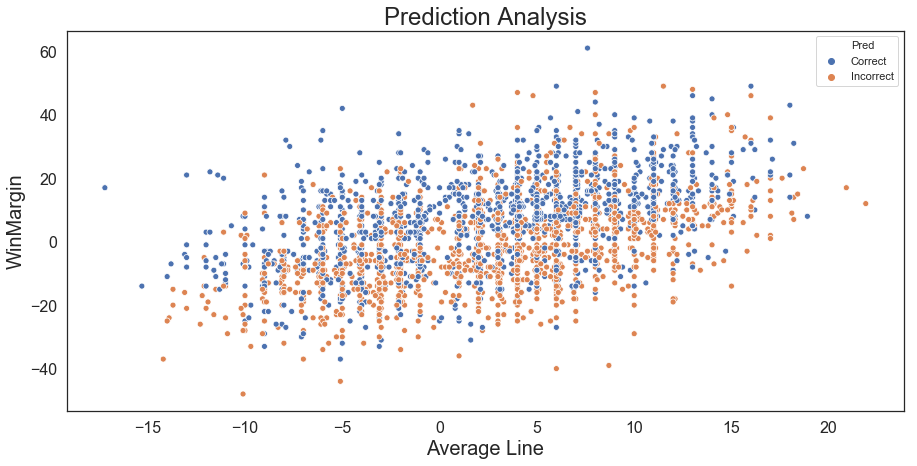

The testing accuracy is 49.35%


In [49]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## LSTM

In [50]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [51]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=10, verbose=1, shuffle=False)

Train on 11922 samples, validate on 2981 samples
Epoch 1/10
11922/11922 [==============================] - 31s 3ms/step - loss: 0.8629 - val_loss: 0.9262
Epoch 2/10
11922/11922 [==============================] - 37s 3ms/step - loss: 0.8095 - val_loss: 0.9662
Epoch 3/10
11922/11922 [==============================] - 29s 2ms/step - loss: 0.8264 - val_loss: 0.9610
Epoch 4/10
11922/11922 [==============================] - 27s 2ms/step - loss: 0.7836 - val_loss: 0.9090
Epoch 5/10
11922/11922 [==============================] - 27s 2ms/step - loss: 0.7910 - val_loss: 0.9175
Epoch 6/10
11922/11922 [==============================] - 32s 3ms/step - loss: 0.7836 - val_loss: 0.9002
Epoch 7/10
11922/11922 [==============================] - 30s 3ms/step - loss: 0.7802 - val_loss: 0.8955
Epoch 8/10
11922/11922 [==============================] - 32s 3ms/step - loss: 0.7783 - val_loss: 0.8944
Epoch 9/10
11922/11922 [==============================] - 31s 3ms/step - loss: 0.7768 - val_loss: 0.8940
Epoch 

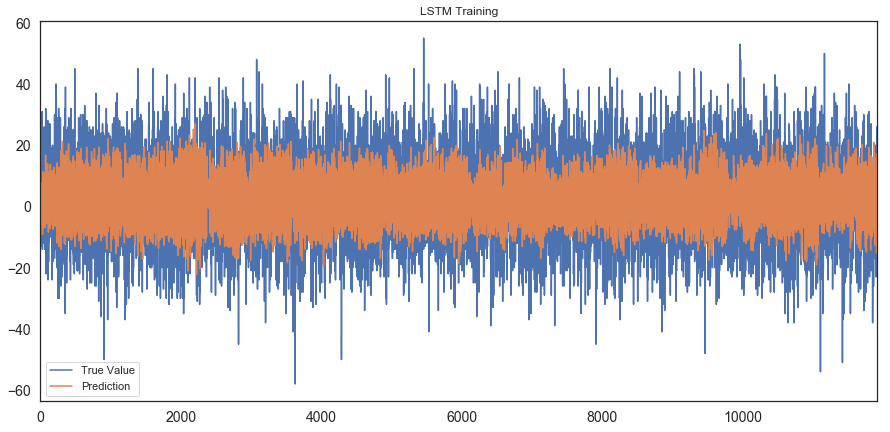

adj train r^2 = 0.21137000270805895
train mse = 136.98838490134003


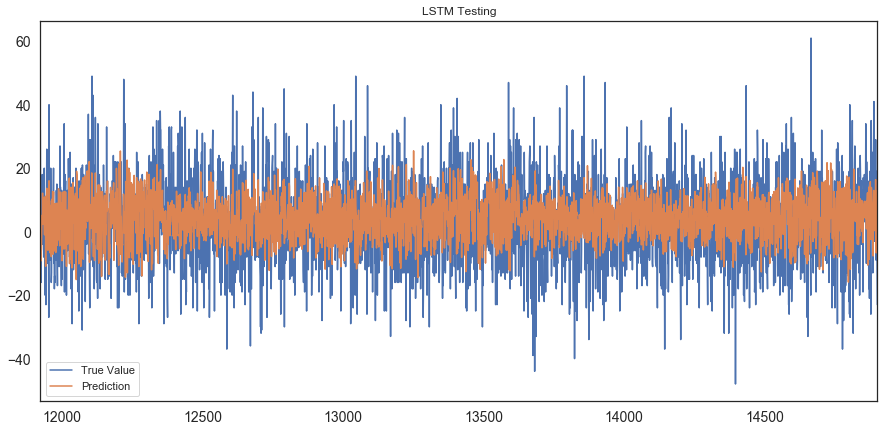

adj test r^2 = 0.1691618638740966
test mse = 158.3647351545058


In [52]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [53]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 52.03%
The testing accuracy is 50.32%


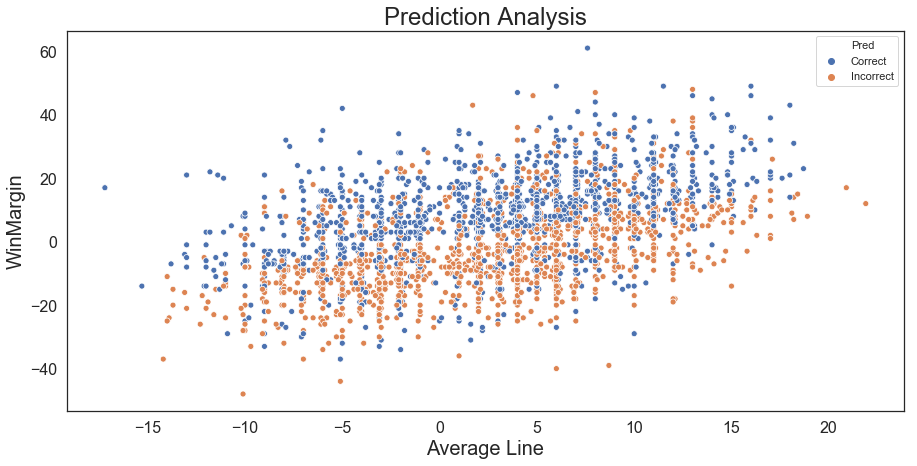

The testing accuracy is 50.32%


In [54]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## TPOT

In [55]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: -0.7713850247152148
Generation 2 - Current best internal CV score: -0.7713074804664799
Generation 3 - Current best internal CV score: -0.7712832634215239
Generation 4 - Current best internal CV score: -0.7712832634215239
Generation 5 - Current best internal CV score: -0.7712832634215239
Generation 6 - Current best internal CV score: -0.771265354610165
Generation 7 - Current best internal CV score: -0.771265354610165
Generation 8 - Current best internal CV score: -0.771265354610165
Generation 9 - Current best internal CV score: -0.771265354610165
Generation 10 - Current best internal CV score: -0.771265354610165
Generation 11 - Current best internal CV score: -0.771265354610165
Generation 12 - Current best internal CV score: -0.771265354610165
Generation 13 - Current best internal CV score: -0.771265354610165
Generation 14 - Current best internal CV score: -0.771265354610165
Generation 15 - Current best internal CV score: -0.771265354610165

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

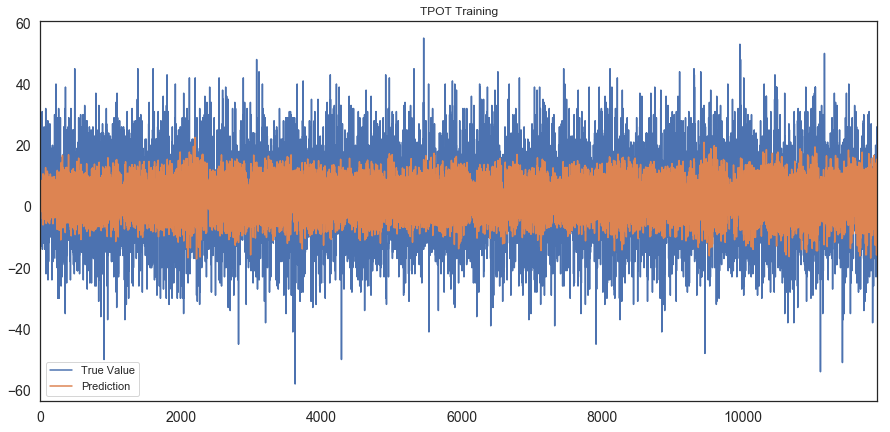

adj train r^2 = 0.2135323292642537
train mse = 136.61277958125387


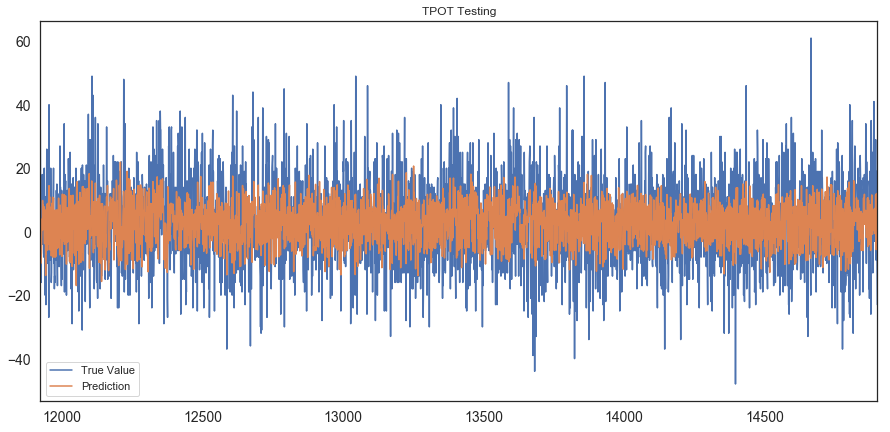

adj test r^2 = 0.20316603796040067
test mse = 151.88325363701657


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [57]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 50.68%
The testing accuracy is 50.39%


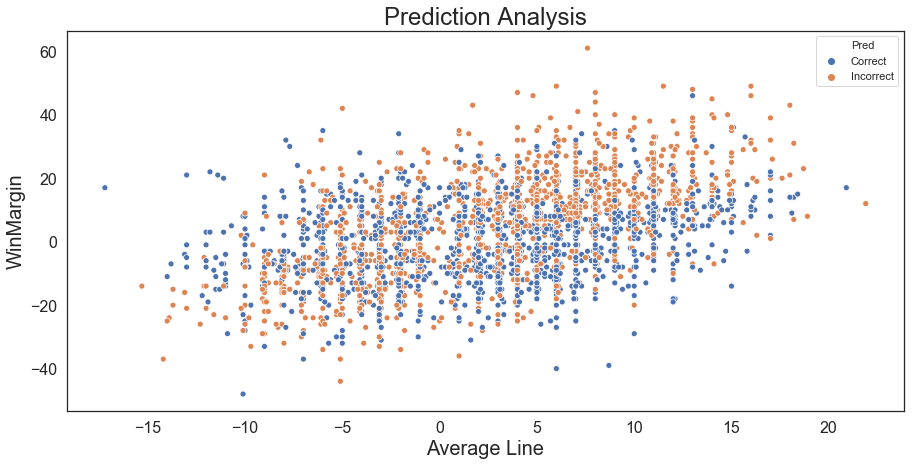

The testing accuracy is 50.39%


In [58]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')